In [20]:
import numpy as np
import cv2
import PIL.Image as Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
pip install tensorflow_hub


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

In [21]:
import pathlib
data_dir=pathlib.Path('c:/dataholder/sports')
data_dir


WindowsPath('c:/dataholder/sports')

In [22]:
list(data_dir.glob("*/*.jpg"))[:5]
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

997

In [23]:
sports_dict={
    'air hockey':list(data_dir.glob('air hockey/*')),
    "boxing":list(data_dir.glob('boxing/*')),
    "cricket":list(data_dir.glob('cricket/*')),
    "football":list(data_dir.glob('football/*')),
    "formula 1 racing":list(data_dir.glob('formula 1 racing/*')),
    "luge":list(data_dir.glob('luge/*')),
    "motorcycle racing":list(data_dir.glob('motorcycle racing/*'))
}

In [24]:
label_dict={
    "air hockey":0,
    "boxing":1,
    "cricket":2,
    "football":3,
    "formula 1 racing":4,
    "luge":5,
    "motorcycle racing":6
    
}

In [25]:
from keras.preprocessing.image import ImageDataGenerator as IDG
train_gen = IDG(rescale=1./255, horizontal_flip=True, rotation_range=20, validation_split=0.2)

# Load Data
train_ds = train_gen.flow_from_directory(data_dir, target_size=(224,224), class_mode="sparse", subset='training', shuffle=True, batch_size=32)
valid_ds = train_gen.flow_from_directory(data_dir, target_size=(224,224), class_mode="sparse", subset='validation', shuffle=True, batch_size=32)



Found 800 images belonging to 7 classes.
Found 197 images belonging to 7 classes.


In [26]:
resnet_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [27]:
from tensorflow.keras.layers import Dropout, BatchNormalization
import tensorflow_hub as hub
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))


In [28]:
model = tf.keras.Sequential([
    feature_extractor_layer,
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512,  activation="relu"),
    tf.keras.layers.Dense(256,  activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128,  activation="relu"),
    layers.Dense(23, activation='softmax', name='output_layer')
  ])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)               0

In [30]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [31]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=10)

Epoch 1/10
25/25 [==============================] - 33s 1s/step - loss: 0.9340 - accuracy: 0.7412 - val_loss: 0.2195 - val_accuracy: 0.9391
Epoch 2/10
25/25 [==============================] - 28s 1s/step - loss: 0.1440 - accuracy: 0.9575 - val_loss: 0.2083 - val_accuracy: 0.9239
Epoch 3/10
25/25 [==============================] - 28s 1s/step - loss: 0.1306 - accuracy: 0.9563 - val_loss: 0.1609 - val_accuracy: 0.9289
Epoch 4/10
25/25 [==============================] - 28s 1s/step - loss: 0.1192 - accuracy: 0.9550 - val_loss: 0.2740 - val_accuracy: 0.9340
Epoch 5/10
25/25 [==============================] - 28s 1s/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.1165 - val_accuracy: 0.9695
Epoch 6/10
25/25 [==============================] - 28s 1s/step - loss: 0.0673 - accuracy: 0.9850 - val_loss: 0.1083 - val_accuracy: 0.9797
Epoch 7/10
25/25 [==============================] - 28s 1s/step - loss: 0.0490 - accuracy: 0.9812 - val_loss: 0.2083 - val_accuracy: 0.9442
Epoch 8/10
25/25 [==

In [32]:
model.evaluate(valid_ds)

7/7 [==============================] - 6s 734ms/step - loss: 0.1387 - accuracy: 0.9645


[0.13869331777095795, 0.9644669890403748]

<AxesSubplot:>

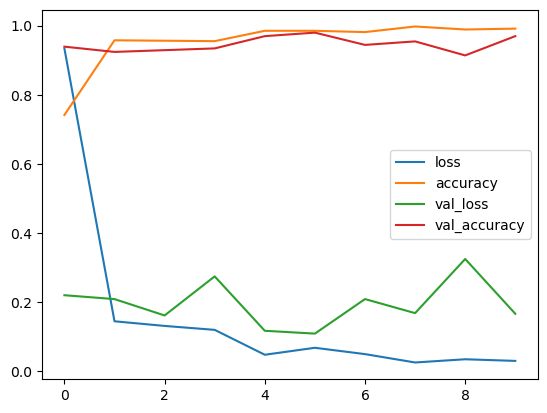

In [33]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [34]:
size=(224,224)
cricket=Image.open('C:/dataholder/sports/cricket/051.jpg')

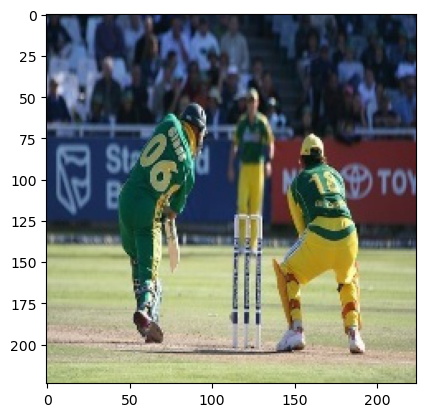

In [35]:
import matplotlib.pyplot as plt
plt.imshow(cricket)

In [36]:
cricket=np.array(cricket)/255
cricket.shape

(224, 224, 3)

In [37]:
result=model.predict(cricket[np.newaxis,...])

1/1 [==============================] - 1s 622ms/step


In [38]:
result

array([[5.4143722e-05, 1.7960621e-04, 5.1306218e-01, 4.8591086e-01,
        9.7198290e-06, 9.3042850e-05, 6.2129322e-05, 1.8704725e-06,
        1.4078295e-05, 7.5297276e-06, 3.1142943e-06, 8.2996266e-05,
        2.2457824e-04, 6.5936183e-05, 3.1124313e-05, 9.6551767e-06,
        2.9311370e-05, 1.8418775e-06, 7.8203793e-06, 1.0471778e-04,
        3.5994439e-05, 6.8526006e-06, 8.9153212e-07]], dtype=float32)

In [39]:
for i in label_dict:
  if label_dict[i]==np.argmax(result):
    print(i)

cricket


In [40]:
model.save('C:/dlassignment/sports.h5')

C:\Users\safar\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
from keras.models import load_model
import tensorflow_hub as hub
safar=load_model("C:/Users/safar/Downloads/sports.h5",custom_objects={"KerasLayer":hub.KerasLayer})

In [4]:
safar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)               0